In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

print('\n train shape = ', x_train.shape, ', train label shape= ', t_train.shape)
print(' test shape = ', x_test.shape, ', test label shape = ' , t_test.shape)

print('\ntrain label = ', t_train)  # 학습데이터 정답 출력
print('test label  = ', t_test)     # 테스트 데이터 정답 출력

11493376/11490434 [==============================] - 0s 0us/step

 train shape =  (60000, 28, 28) , train label shape=  (60000,)
 test shape =  (10000, 28, 28) , test label shape =  (10000,)

train label =  [5 0 4 ... 5 6 8]
test label  =  [7 2 1 ... 4 5 6]


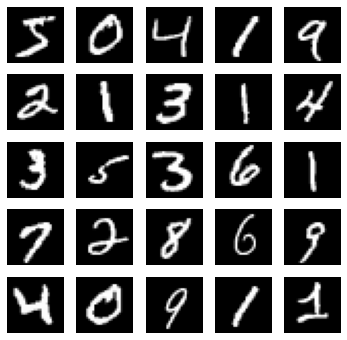

In [3]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6, 6))

for index in range(25):
    plt.subplot(5, 5, index + 1)    # 5행 5열
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off')
    # plt.title(str(t_train[index]))

plt.show()

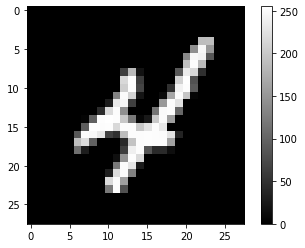

In [4]:
plt.imshow(x_train[9], cmap='gray')
plt.colorbar()
plt.show()

In [5]:
# 학습 데이터 / 테스트 데이터 정규화 (Normalization)

x_train = (x_train - 0.0) / (255.0 - 0.0)

x_test = (x_test - 0.0) / (255.0 - 0.0)


# 정답 데이터 원핫 인코딩 (One-Hot Encoding)

t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)

t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)
# MNIST 정답 데이터는 0~9 까지 총 10 개의 숫자 가운데 하나이므로, num_classes=10 지정하여 10개의 리스트를 만들어서 원핫 인코딩을 수행함

In [6]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))    # 28x28 크기 2차원 이미지를 784 개의 1차원 벡터로 변환

model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [7]:
# 정답을 원핫 인코딩 방식으로 나타냈기 때문에 loss='categorical_crossentropy'
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [8]:
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3) # training data로 부터 30% 비율로 validation data 생성후 overfitting 확인

Epoch 1/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3204 - accuracy: 0.9101 - val_loss: 0.1981 - val_accuracy: 0.9438
Epoch 2/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1496 - accuracy: 0.9568 - val_loss: 0.1680 - val_accuracy: 0.9498
Epoch 3/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1052 - accuracy: 0.9688 - val_loss: 0.1238 - val_accuracy: 0.9637
Epoch 4/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0796 - accuracy: 0.9760 - val_loss: 0.1099 - val_accuracy: 0.9673
Epoch 5/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0620 - accuracy: 0.9818 - val_loss: 0.1099 - val_accuracy: 0.9677
Epoch 6/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0489 - accuracy: 0.9852 - val_loss: 0.1034 - val_accuracy: 0.9694
Epoch 7/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0388 - accuracy: 0.9886 - val_loss: 0.0999 - val_accuracy:

In [9]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1328 - accuracy: 0.9756


[0.13276365399360657, 0.975600004196167]

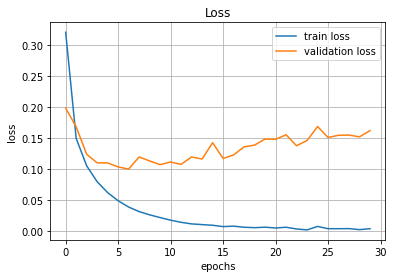

In [11]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

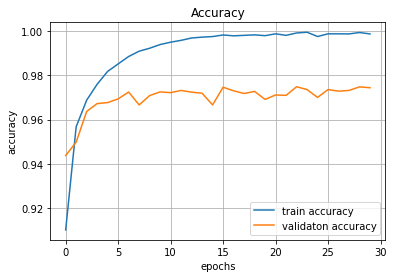

In [12]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validaton accuracy')

plt.legend(loc='best')
plt.show()

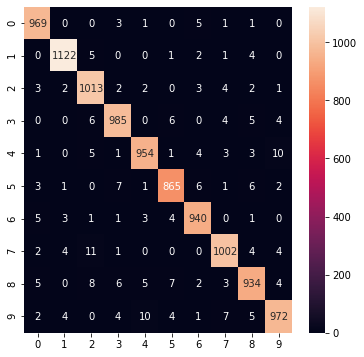

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6, 6))
# 테이스 입력 데이터에 대한 prediction 실행
predicted_value = model.predict(x_test)

cm = confusion_matrix(np.argmax(t_test, axis=-1), np.argmax(predicted_value, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [14]:
print(cm)
print('\n')

for i in range(10):
    print(('label = %d\t(%d/%d)\taccuracy = %.3f') % (i, np.max(cm[i]), np.sum(cm[i]), np.max(cm[i])/np.sum(cm[i])))

# 0에 대해서는 대부분 맞추는 반면에 5에 대해서는 많이 혼란스러워함

[[ 969    0    0    3    1    0    5    1    1    0]
 [   0 1122    5    0    0    1    2    1    4    0]
 [   3    2 1013    2    2    0    3    4    2    1]
 [   0    0    6  985    0    6    0    4    5    4]
 [   1    0    5    1  954    1    4    3    3   10]
 [   3    1    0    7    1  865    6    1    6    2]
 [   5    3    1    1    3    4  940    0    1    0]
 [   2    4   11    1    0    0    0 1002    4    4]
 [   5    0    8    6    5    7    2    3  934    4]
 [   2    4    0    4   10    4    1    7    5  972]]


label = 0	(969/980)	accuracy = 0.989
label = 1	(1122/1135)	accuracy = 0.989
label = 2	(1013/1032)	accuracy = 0.982
label = 3	(985/1010)	accuracy = 0.975
label = 4	(954/982)	accuracy = 0.971
label = 5	(865/892)	accuracy = 0.970
label = 6	(940/958)	accuracy = 0.981
label = 7	(1002/1028)	accuracy = 0.975
label = 8	(934/974)	accuracy = 0.959
label = 9	(972/1009)	accuracy = 0.963
